### Análise Exploratória de Admissão na Pós-Gradução em Universidades Americanas

#### Authors: 
    Bianca Amorim
    Michelle Santos
    
Data: 18/05/2019

#### Descrição da Base

The dataset contains several parameters which are considered important during the application for Masters Programs. 

The parameters included are : 

    1. GRE Scores ( out of 340 ) 
    2. TOEFL Scores ( out of 120 ) 
    3. University Rating ( out of 5 ) 
    4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
    5. Undergraduate GPA ( out of 10 ) 
    6. Research Experience ( either 0 or 1 ) 
    7. Chance of Admit ( ranging from 0 to 1 )
    
 Link da base: https://www.kaggle.com/mohansacharya/graduate-admissions

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys
plt.style.use('seaborn-talk')

df = pd.read_csv("Admission_Predict.csv", sep = ',', low_memory=False)

In [2]:
print(df.head())

   Serial_No  GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  \
0          1        337          118                  4  4.5  4.5  9.65   
1          2        324          107                  4  4.0  4.5  8.87   
2          3        316          104                  3  3.0  3.5  8.00   
3          4        322          110                  3  3.5  2.5  8.67   
4          5        314          103                  2  2.0  3.0  8.21   

   Research  Admit  
0         1   0.92  
1         1   0.76  
2         1   0.72  
3         1   0.80  
4         0   0.65  


In [3]:
print(df.describe())

        Serial_No   GRE_Score  TOEFL_Score  University_Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

              LOR        CGPA    Research       Admit  
count  400.000000  400.000000  400.000000  400.000000  
mean     3.452500    8.598925    0.547500    0.724350  
std      0.898478    0.596317    0.498362    0.142609  
min      1.000000    6.800000    0.000000    0.340000  
25%      3.000000    8.170

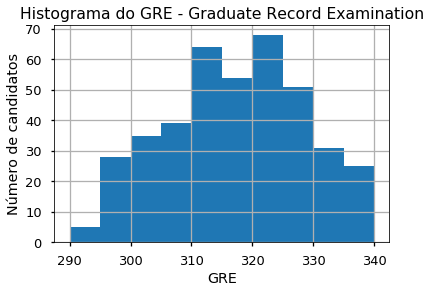

In [4]:
# Gerando um histograma do GRE - Graduate Record Examination (vestibular)
df.GRE_Score.hist()
plt.xlabel("GRE")
plt.ylabel("Número de candidatos")
plt.title("Histograma do GRE - Graduate Record Examination")
plt.show()

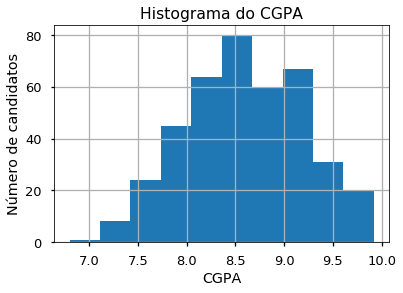

In [5]:
# Gerando um histograma do CGPA - Histórico da escola
df.CGPA.hist()
plt.xlabel("CGPA")
plt.ylabel("Número de candidatos")
plt.title("Histograma do CGPA")
plt.show()

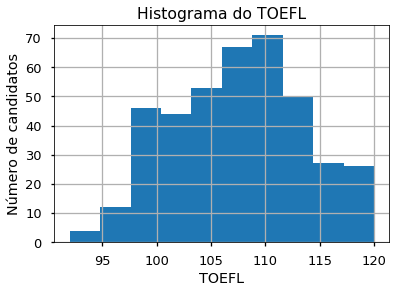

In [6]:
# Gerando um histograma do TOEFL_Score
df.TOEFL_Score.hist()
plt.xlabel("TOEFL")
plt.ylabel("Número de candidatos")
plt.title("Histograma do TOEFL")
plt.show()

In [8]:
# Importando o módulo de Regressão Linear do scikit-learn
from sklearn.linear_model import LinearRegression

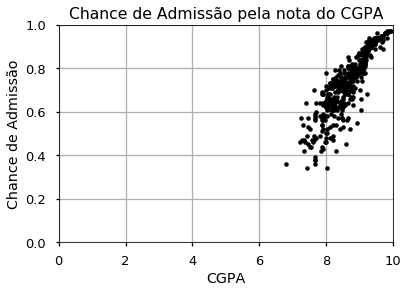

In [9]:
plt.figure()
plt.xlabel('CGPA')
plt.ylabel('Chance de Admissão')
plt.title('Chance de Admissão pela nota do CGPA')
plt.plot(df.CGPA, df.Admit, 'k.')
plt.axis([0, 10, 0, 1])
plt.grid(True)
plt.show()

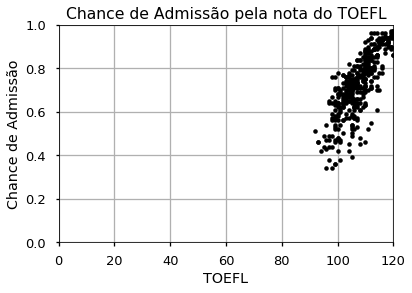

In [10]:
plt.figure()
plt.xlabel('TOEFL')
plt.ylabel('Chance de Admissão')
plt.title('Chance de Admissão pela nota do TOEFL')
plt.plot(df.TOEFL_Score, df.Admit, 'k.')
plt.axis([0, 120, 0, 1])
plt.grid(True)
plt.show()

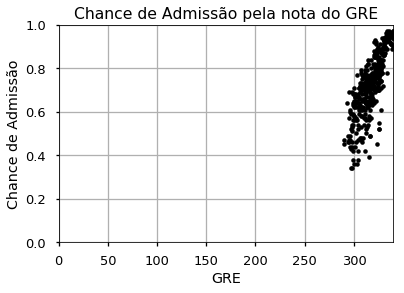

In [11]:
plt.figure()
plt.xlabel('GRE')
plt.ylabel('Chance de Admissão')
plt.title('Chance de Admissão pela nota do GRE')
plt.plot(df.GRE_Score, df.Admit, 'k.')
plt.axis([0, 340, 0, 1])
plt.grid(True)
plt.show()

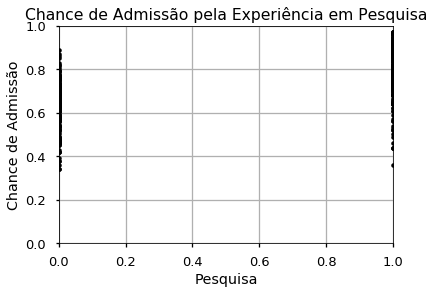

In [12]:
plt.figure()
plt.xlabel('Pesquisa')
plt.ylabel('Chance de Admissão')
plt.title('Chance de Admissão pela Experiência em Pesquisa')
plt.plot(df.Research, df.Admit, 'k.')
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.show()

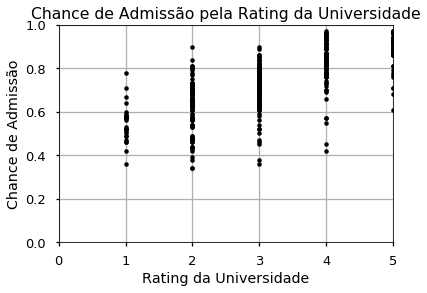

In [13]:
plt.figure()
plt.xlabel('Rating da Universidade')
plt.ylabel('Chance de Admissão')
plt.title('Chance de Admissão pela Rating da Universidade')
plt.plot(df.University_Rating, df.Admit, 'k.')
plt.axis([0, 5, 0, 1])
plt.grid(True)
plt.show()

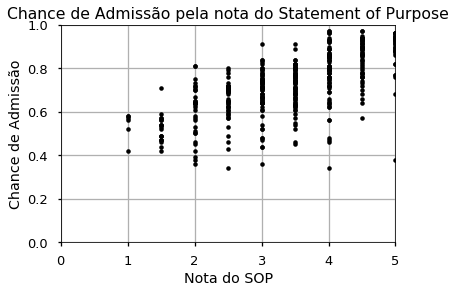

In [14]:
plt.figure()
plt.xlabel('Nota do SOP')
plt.ylabel('Chance de Admissão')
plt.title('Chance de Admissão pela nota do Statement of Purpose')
plt.plot(df.SOP, df.Admit, 'k.')
plt.axis([0, 5, 0, 1])
plt.grid(True)
plt.show()

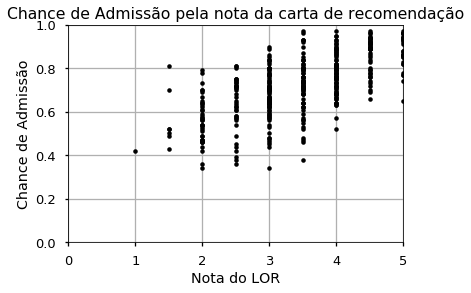

In [15]:
plt.figure()
plt.xlabel('Nota do LOR')
plt.ylabel('Chance de Admissão')
plt.title('Chance de Admissão pela nota da carta de recomendação')
plt.plot(df.LOR, df.Admit, 'k.')
plt.axis([0, 5, 0, 1])
plt.grid(True)
plt.show()

# Regressão Linear

In [21]:
X = df.LOR
Y = df.Admit

AttributeError: 'Series' object has no attribute 'reshape'

In [17]:
# Criando o modelo
modelo = LinearRegression()

In [18]:
type(modelo)

sklearn.linear_model.base.LinearRegression

In [19]:
# Treinando o modelo
modelo.fit(X, Y)

ValueError: Expected 2D array, got 1D array instead:
array=[4.5 4.5 3.5 2.5 3.  3.  4.  4.  1.5 3.  4.  4.5 4.5 3.  2.  2.5 3.  3.
 3.  3.  2.  2.  5.  4.5 3.5 4.5 3.5 2.5 2.  2.  3.  4.  4.5 4.  5.  5.
 4.  2.  1.5 3.5 3.  2.5 2.  4.  4.  4.  5.  4.  5.  4.  4.5 3.5 3.  2.5
 3.5 3.  3.  2.  2.  2.  3.  3.  3.  3.  3.5 3.5 3.  3.5 4.  4.  5.  5.
 5.  4.  5.  4.  3.  2.  2.  2.  3.  5.  4.5 4.5 4.5 3.5 3.5 3.  3.5 3.5
 4.  3.5 3.  3.  2.5 2.5 3.  4.  4.5 4.  3.5 3.  3.5 4.  3.  4.5 4.5 4.5
 5.  4.  3.  4.  3.5 3.5 3.  4.5 3.5 2.5 3.5 3.5 5.  4.5 2.5 3.5 3.  3.
 3.  2.  3.  5.  4.5 4.5 3.5 4.5 4.  4.  4.  3.  3.  3.5 3.  3.5 3.5 4.
 3.5 2.5 2.5 3.  3.5 3.  4.  5.  5.  4.  3.5 3.  2.5 2.5 2.5 2.  2.  3.
 3.  3.  4.  4.  5.  3.  4.  3.  3.5 4.5 5.  4.5 4.  3.5 4.5 3.5 3.  3.
 3.  2.5 3.5 4.  4.  4.5 3.  3.5 3.5 5.  4.  5.  4.  5.  3.  3.5 2.5 2.5
 4.5 4.5 3.  3.  4.5 5.  4.  3.  3.  4.  3.  4.  4.  4.  5.  4.5 5.  4.5
 4.5 4.  3.5 3.5 4.  4.  4.  4.  2.  2.5 4.  3.  3.5 3.  4.5 2.5 3.5 3.5
 4.  4.  4.5 5.  3.5 2.  3.  2.  3.  3.  4.  2.5 3.5 3.5 4.  4.  2.5 3.
 3.5 4.5 5.  4.5 4.  5.  5.  4.5 3.5 4.  4.  1.5 2.5 2.5 2.5 3.5 5.  5.
 3.  2.  1.5 1.5 2.5 3.  4.5 3.  3.5 4.  4.  4.5 3.5 3.  4.5 4.  4.  4.5
 5.  3.5 3.  2.  2.  3.  2.  2.5 3.5 4.5 4.5 3.5 2.5 3.  3.  3.5 2.  3.5
 3.5 4.  3.  3.  3.5 4.  4.5 3.  4.  3.  2.  2.5 2.  3.  3.5 4.  4.  2.5
 2.5 4.  2.  2.  3.5 1.5 3.  2.  2.5 3.5 4.  4.5 2.5 5.  4.  4.  3.  3.5
 3.  3.5 2.  2.  2.  1.  2.  3.  3.5 4.  3.5 2.5 3.  3.5 4.  3.5 2.  1.5
 5.  3.5 5.  3.  4.  3.  4.5 2.5 2.  3.  2.5 3.  4.  3.  2.5 2.5 2.  2.
 2.5 3.  4.  3.5 4.  3.5 5.  5.  3.5 3.5 2.  4.  2.5 3.  3.5 3.  4.  3.5
 3.5 4.5 4.  4. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.